In [10]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as ss
import scipy.optimize as opt
import scipy.integrate as intgr
import time

Part A

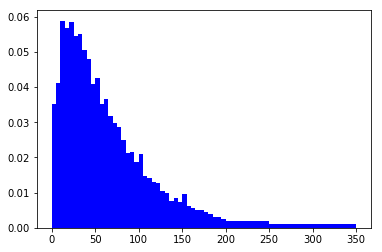

In [11]:
data = np.loadtxt("usincmoms.txt")

plt.bar(data[:40,1]/1000,data[:40,0],width=5,color='b')
plt.bar(data[40,1]/1000,data[40,0]/10,width=50,color='b')
plt.bar(data[41,1]/1000,data[41,0]/20,width=100,color='b')
plt.show()

Part B

In [12]:
def lognormal(x,mu,sigma):
    r = (1/(x*sigma*np.sqrt(2*np.pi)))*np.exp(-(((np.log(x)-mu)**2)/(2*sigma**2)))
    return r

def gamma(x,a,B):
    r = (1/(B**a * ss.gamma(a))) * (x**(a-1)) * np.exp(-(x/B))
    return r

def model_moments(lnormal, data, mu, sigma):
    xfx = lambda x: lnormal(x, mu, sigma)
    vec = np.zeros(len(data))
    for i in range(len(data)-2):
        (vec[i],err) = intgr.quad(xfx,data[i,1]-2499.9999,data[i,1]+2499.9999)
    vec[len(data)-2],err2  = intgr.quad(xfx,data[len(data)-2,1]-24999.9999,data[len(data)-2,1]+24999.9999)
    vec[len(data)-1],err3  = intgr.quad(xfx,data[len(data)-1,1]-49999.9999,data[len(data)-1,1]+49999.9999)
    return vec

Total Iteration Time (Lognorm) : 1.5589227676391602 seconds
   
Final Min. Value (Lognorm)    : 90517.8354075
Final Mu Value (Lognorm)      : 10.8190203771
Final Sigma Value (Lognorm)   : 0.842764342905


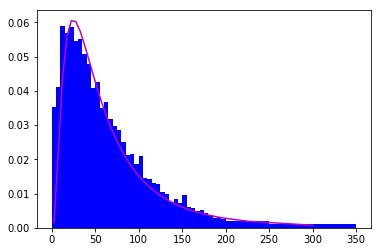

In [13]:
W = np.diag(data[:,1])

mu_i = 10 #np.log(np.mean(data[:,0]))
sigma_i = 15
pmi = np.array([mu_i, sigma_i])

def GMM(params,data,f,W):
    mu,sigma = params
    
    moms_data = data[:,0]
    moms_model= model_moments(f,data,mu,sigma)
    e_m = (moms_model - moms_data) / moms_data
    crit = e_m.T @ W @ e_m
    return crit

gmm_args = (data,lognormal,W)

start = time.time()
result = opt.minimize(GMM,pmi,args=(gmm_args),method="L-BFGS-B",bounds=((None, None), (1e-10, None)))
print("Total Iteration Time (Lognorm) :",time.time()-start,"seconds")
print("   ")
print("Final Min. Value (Lognorm)    :",result.fun)
print("Final Mu Value (Lognorm)      :",result.x[0])
print("Final Sigma Value (Lognorm)   :",result.x[1])

plt.bar(data[:40,1]/1000,data[:40,0],width=5,color='b')
plt.bar(data[40,1]/1000,data[40,0]/10,width=50,color='b')
plt.bar(data[41,1]/1000,data[41,0]/20,width=100,color='b')
plt.plot(data[:,1]/1000,4500*lognormal(data[:,1],result.x[0],result.x[1]),color='m')
plt.show()

Part C: Estimate w/ gamma distribution

Total Iteration Time (Gamma) : 448.9721691608429 seconds
   
Final Min. Value (Gamma)    : 134868.861735
Final Alpha Value (Gamma)   : 1.16705601323
Final Beta Value (Gamma)    : 53282.5777765


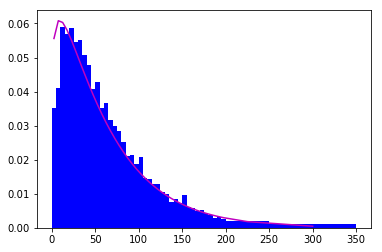

In [9]:
B0 = 20000
a0 = 3
pmi2 = np.array([a0, B0])

gmm_args2 = (data,gamma,W)

start2 = time.time()
result2 = opt.minimize(GMM,pmi2,args=(gmm_args2),method="L-BFGS-B",bounds=((1e-10, None), (1e-10, None)))
print("Total Iteration Time (Gamma) :",time.time()-start2,"seconds")
print("   ")
print("Final Min. Value (Gamma)    :",result2.fun)
print("Final Alpha Value (Gamma)   :",result2.x[0])
print("Final Beta Value (Gamma)    :",result2.x[1])

plt.bar(data[:40,1]/1000,data[:40,0],width=5,color='b')
plt.bar(data[40,1]/1000,data[40,0]/10,width=50,color='b')
plt.bar(data[41,1]/1000,data[41,0]/20,width=100,color='b')
plt.plot(data[:,1]/1000,4800*gamma(data[:,1],result2.x[0],result.x[1]),color='m')
plt.show()


Part D

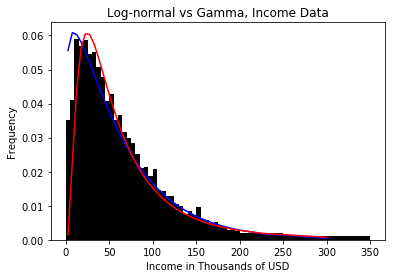

In [19]:
plt.bar(data[:40,1]/1000,data[:40,0],width=5,color='k')
plt.bar(data[40,1]/1000,data[40,0]/10,width=50,color='k')
plt.bar(data[41,1]/1000,data[41,0]/20,width=100,color='k')
plt.plot(data[:,1]/1000,4800*gamma(data[:,1],result2.x[0],result2.x[1]),color='b')
plt.plot(data[:,1]/1000,4500*lognormal(data[:,1],result.x[0],result.x[1]),color='r')
plt.title("Log-normal vs Gamma, Income Data")
plt.ylabel("Frequency")
plt.xlabel("Income in Thousands of USD")
plt.show()

Part E

In [50]:
gmm_args_w = (data,gamma,np.eye(len(data)))
r_w = opt.minimize(GMM,pmi2,args=(gmm_args_w),method="L-BFGS-B",bounds=((1e-10, None), (1e-10, None)))
print(r_w.x)
e_vec = model_moments(gamma,data,r_w.x[0],r_w.x[1])
e_m = (e_vec - data[:,1]) / data[:,1]
Omega = np.outer(e_m , e_m)/len(data)
W_2step = np.linalg.inv(Omega)
print(W_2step)

[  1.37434816e+00   4.62118357e+04]
[[  1.34214432e+17  -1.38103302e+17  -1.11791553e+17 ...,  -2.45094206e+16
    5.60206661e+16  -3.45187504e+15]
 [  1.29187169e+17  -1.48215831e+17  -1.00488080e+17 ...,  -5.94233061e+16
    7.53568743e+16   3.43322982e+16]
 [ -6.32909207e+16   6.56792168e+16   1.05395209e+17 ...,  -2.14237547e+17
   -1.23182211e+16   9.24546792e+16]
 ..., 
 [  1.22347876e+17  -1.20149383e+17  -2.30031952e+16 ...,  -5.73233346e+16
    6.60191026e+16   5.35468762e+16]
 [  1.31569349e+16  -2.16549213e+16  -7.63808370e+16 ...,   1.72117859e+17
    2.73293721e+16  -1.31143838e+16]
 [ -1.13831291e+17   8.99628087e+16   5.64995200e+16 ...,   3.54935002e+16
   -4.12540209e+16  -7.33174350e+16]]


We now calculate the model with our new 2-Step W matrix

In [55]:
B0 = 20000
a0 = 3
pmi3 = np.array([a0, B0])

gmm_args3 = (data,gamma,W_2step)

start3 = time.time()
result3 = opt.minimize(GMM,pmi3,args=(gmm_args3),method="L-BFGS-B",bounds=((1e-10, None), (1e-10, None)))
print("Total Iteration Time (Gamma) :",time.time()-start3,"seconds")
print("   ")
print("Final Min. Value (Gamma)    :",result3.fun)
print("Final Alpha Value (Gamma)   :",result3.x[0])
print("Final Beta Value (Gamma)    :",result3.x[1])

Total Iteration Time (Gamma) : 0.9354832172393799 seconds
   
Final Min. Value (Gamma)    : -1.18299108027e+17
Final Alpha Value (Gamma)   : 3.36479991247
Final Beta Value (Gamma)    : 19272.9173836
